In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\perez bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_perez.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-19.5,-16.7,-17.5,-17.5,-14.7,-19.2,-14.7,-14.9,-19.5,-17.5,...,-14.7,-19.2,-14.7,-15.8,-14.7,-19.5,-17.5,-15.8,-14.7,1
1,-17.0,-17.5,-16.7,-17.5,-19.5,-14.7,-19.5,-16.7,-19.5,-14.7,...,-19.5,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-16.7,-17.5,1
2,-15.8,-17.5,-17.5,-14.7,-19.5,-18.1,-15.8,-14.7,-15.8,-17.5,...,-19.5,-18.1,-17.5,-17.0,-16.7,-17.0,-17.5,-16.7,-19.5,1
3,-17.5,-17.5,-18.1,-19.2,-14.7,-19.2,-14.7,-19.5,-17.5,-17.5,...,-17.5,-17.0,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-19.5,1
4,-14.7,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-17.0,-17.5,-16.7,...,-19.5,-17.5,-16.7,-17.0,-17.5,-15.8,-14.7,-19.2,-14.7,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-15.8,-18.1,-17.0,-16.7,-14.7,-19.5,-16.7,-17.5,-17.5,-17.0,...,-15.8,-14.7,-14.9,-19.2,-14.9,-14.9,-14.7,-17.5,-15.8,-18.1
1,-14.9,-14.7,-15.8,-14.7,-17.5,-15.8,-14.9,-14.7,-17.5,-18.1,...,-19.5,-14.7,-14.9,-19.2,-14.7,-19.5,-16.7,-17.0,-18.1,-19.2
2,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,-18.1,-19.5,-17.5,-18.1,...,-17.5,-17.5,-18.1,-19.5,-15.8,-14.7,-15.8,-17.5,-19.5,-14.7
3,-18.1,-19.5,-14.7,-17.5,-16.7,-17.5,-17.5,-19.5,-18.1,-17.5,...,-19.2,-14.7,-15.8,-19.5,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5
4,-17.5,-17.5,-15.8,-14.7,-18.1,-19.2,-14.7,-15.8,-14.7,-15.8,...,-15.8,-14.7,-15.8,-19.5,-14.7,-16.7,-19.5,-14.7,-16.7,-17.0


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-15.8,-18.1,-17.0,-16.7,-14.7,-19.5,-16.7,-17.5,-17.5,-17.0,...,-15.8,-14.7,-14.9,-19.2,-14.9,-14.9,-14.7,-17.5,-15.8,-18.1
1,-14.9,-14.7,-15.8,-14.7,-17.5,-15.8,-14.9,-14.7,-17.5,-18.1,...,-19.5,-14.7,-14.9,-19.2,-14.7,-19.5,-16.7,-17.0,-18.1,-19.2
2,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,-18.1,-19.5,-17.5,-18.1,...,-17.5,-17.5,-18.1,-19.5,-15.8,-14.7,-15.8,-17.5,-19.5,-14.7
3,-18.1,-19.5,-14.7,-17.5,-16.7,-17.5,-17.5,-19.5,-18.1,-17.5,...,-19.2,-14.7,-15.8,-19.5,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5
4,-17.5,-17.5,-15.8,-14.7,-18.1,-19.2,-14.7,-15.8,-14.7,-15.8,...,-15.8,-14.7,-15.8,-19.5,-14.7,-16.7,-19.5,-14.7,-16.7,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-16.7,-17.5,-19.5,-14.7,-15.8,-19.5,-14.9,-18.1,-17.5,-19.5,...,-15.8,-14.7,-15.8,-18.1,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5
14665,-14.7,-17.5,-15.8,-18.1,-14.7,-19.5,-18.1,-14.9,-19.5,-15.8,...,-16.7,-17.5,-17.0,-18.1,-15.8,-14.7,-14.9,-15.8,-17.0,-18.1
14666,-17.5,-17.5,-17.5,-17.5,-19.5,-14.9,-14.7,-19.2,-18.1,-17.0,...,-17.5,-17.0,-15.8,-14.7,-18.1,-19.5,-15.8,-18.1,-17.5,-19.5
14667,-19.2,-14.7,-17.5,-16.7,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,...,-17.0,-16.7,-17.5,-17.5,-17.5,-17.5,-17.0,-18.1,-19.5,-18.1


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-15.8,-18.1,-17.0,-16.7,-14.7,-19.5,-16.7,-17.5,-17.5,-17.0,...,-14.7,-14.9,-19.2,-14.9,-14.9,-14.7,-17.5,-15.8,-18.1,0
1,-14.9,-14.7,-15.8,-14.7,-17.5,-15.8,-14.9,-14.7,-17.5,-18.1,...,-14.7,-14.9,-19.2,-14.7,-19.5,-16.7,-17.0,-18.1,-19.2,0
2,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,-18.1,-19.5,-17.5,-18.1,...,-17.5,-18.1,-19.5,-15.8,-14.7,-15.8,-17.5,-19.5,-14.7,0
3,-18.1,-19.5,-14.7,-17.5,-16.7,-17.5,-17.5,-19.5,-18.1,-17.5,...,-14.7,-15.8,-19.5,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5,0
4,-17.5,-17.5,-15.8,-14.7,-18.1,-19.2,-14.7,-15.8,-14.7,-15.8,...,-14.7,-15.8,-19.5,-14.7,-16.7,-19.5,-14.7,-16.7,-17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-16.7,-17.5,-19.5,-14.7,-15.8,-19.5,-14.9,-18.1,-17.5,-19.5,...,-14.7,-15.8,-18.1,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5,0
14665,-14.7,-17.5,-15.8,-18.1,-14.7,-19.5,-18.1,-14.9,-19.5,-15.8,...,-17.5,-17.0,-18.1,-15.8,-14.7,-14.9,-15.8,-17.0,-18.1,0
14666,-17.5,-17.5,-17.5,-17.5,-19.5,-14.9,-14.7,-19.2,-18.1,-17.0,...,-17.0,-15.8,-14.7,-18.1,-19.5,-15.8,-18.1,-17.5,-19.5,0
14667,-19.2,-14.7,-17.5,-16.7,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,...,-16.7,-17.5,-17.5,-17.5,-17.5,-17.0,-18.1,-19.5,-18.1,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-16.745136
1,-79,-16.755505
2,-78,-16.784532
3,-77,-16.759091
4,-76,-16.752614
...,...,...
94,14,-16.782698
95,15,-16.762151
96,16,-16.753623
97,17,-16.738455


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-16.733008,150
1,-79,-16.735115,151
2,-78,-16.724037,152
3,-77,-16.702706,153
4,-76,-16.754482,154
...,...,...,...
94,14,-16.713252,244
95,15,-16.734897,245
96,16,-16.715713,246
97,17,-16.702815,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


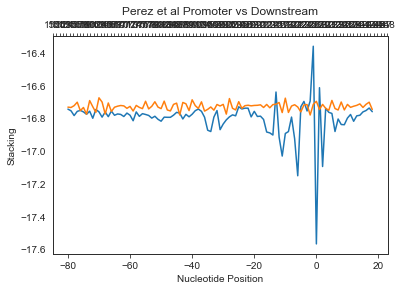

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Perez et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-19.5,-16.7,-17.5,-17.5,-14.7,-19.2,-14.7,-14.9,-19.5,-17.5,...,-14.7,-19.2,-14.7,-15.8,-14.7,-19.5,-17.5,-15.8,-14.7,1
1,-17.0,-17.5,-16.7,-17.5,-19.5,-14.7,-19.5,-16.7,-19.5,-14.7,...,-19.5,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-16.7,-17.5,1
2,-15.8,-17.5,-17.5,-14.7,-19.5,-18.1,-15.8,-14.7,-15.8,-17.5,...,-19.5,-18.1,-17.5,-17.0,-16.7,-17.0,-17.5,-16.7,-19.5,1
3,-17.5,-17.5,-18.1,-19.2,-14.7,-19.2,-14.7,-19.5,-17.5,-17.5,...,-17.5,-17.0,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-19.5,1
4,-14.7,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-17.0,-17.5,-16.7,...,-19.5,-17.5,-16.7,-17.0,-17.5,-15.8,-14.7,-19.2,-14.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-16.7,-17.5,-19.5,-14.7,-15.8,-19.5,-14.9,-18.1,-17.5,-19.5,...,-14.7,-15.8,-18.1,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5,0
29334,-14.7,-17.5,-15.8,-18.1,-14.7,-19.5,-18.1,-14.9,-19.5,-15.8,...,-17.5,-17.0,-18.1,-15.8,-14.7,-14.9,-15.8,-17.0,-18.1,0
29335,-17.5,-17.5,-17.5,-17.5,-19.5,-14.9,-14.7,-19.2,-18.1,-17.0,...,-17.0,-15.8,-14.7,-18.1,-19.5,-15.8,-18.1,-17.5,-19.5,0
29336,-19.2,-14.7,-17.5,-16.7,-19.5,-14.9,-14.7,-17.5,-15.8,-14.7,...,-16.7,-17.5,-17.5,-17.5,-17.5,-17.0,-18.1,-19.5,-18.1,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
X.shape

(29338, 99)

## Model Training

In [28]:
kfold = KFold(n_splits=10, shuffle=True)
clf = XGBClassifier(colsample_bytree=0.5, gamma=0, learning_rate=0.1, 
                    max_depth=None, min_child_weight=5, n_estimators=300, 
                    subsample=1.0, n_jobs=-1, random_state=101)
fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.880027266530334, Precision: 0.8977110157367668, Recall: 0.85724043715847, F1 Score: 0.8770090845562544, MCC: 0.7608019517934049, Specificity: 0.9027210884353741
Fold 2: Accuracy: 0.8820722563053851, Precision: 0.9044982698961938, Recall: 0.8627062706270627, F1 Score: 0.8831081081081081, MCC: 0.7651308750438169, Specificity: 0.9027484143763214
Fold 3: Accuracy: 0.8680981595092024, Precision: 0.8838053740014524, Recall: 0.842797783933518, F1 Score: 0.8628146047500888, MCC: 0.736712563486112, Specificity: 0.8926174496644296
Fold 4: Accuracy: 0.8670756646216768, Precision: 0.8823948681397007, Recall: 0.8462064251537936, F1 Score: 0.8639218422889045, MCC: 0.7347346348059204, Specificity: 0.8878314072059823
Fold 5: Accuracy: 0.8725289706884799, Precision: 0.8829337094499294, Recall: 0.8575342465753425, F1 Score: 0.8700486448922863, MCC: 0.7453229212150173, Specificity: 0.8873812754409769
Fold 6: Accuracy: 0.8640081799591002, Precision: 0.8789808917197452, Recall: 0.844897

In [29]:
accuracy_list

[0.880027266530334,
 0.8820722563053851,
 0.8680981595092024,
 0.8670756646216768,
 0.8725289706884799,
 0.8640081799591002,
 0.8684389911383776,
 0.8660531697341514,
 0.8731674053869758,
 0.8724855097170133]

In [30]:
precision_list

[0.8977110157367668,
 0.9044982698961938,
 0.8838053740014524,
 0.8823948681397007,
 0.8829337094499294,
 0.8789808917197452,
 0.890391459074733,
 0.8733333333333333,
 0.8954005934718101,
 0.9176895306859206]

In [31]:
recall_list

[0.85724043715847,
 0.8627062706270627,
 0.842797783933518,
 0.8462064251537936,
 0.8575342465753425,
 0.8448979591836735,
 0.8435603506405934,
 0.841541755888651,
 0.8393602225312935,
 0.8301763553233181]

In [32]:
specificity_list

[0.9027210884353741,
 0.9027484143763214,
 0.8926174496644296,
 0.8878314072059823,
 0.8873812754409769,
 0.8831967213114754,
 0.8938662991040661,
 0.8884540117416829,
 0.905685618729097,
 0.9186875891583453]

In [33]:
f1_score_list 

[0.8770090845562544,
 0.8831081081081081,
 0.8628146047500888,
 0.8639218422889045,
 0.8700486448922863,
 0.8616024973985431,
 0.866343490304709,
 0.8571428571428572,
 0.8664752333094042,
 0.8717421124828533]

In [34]:
mcc_list

[0.7608019517934049,
 0.7651308750438169,
 0.736712563486112,
 0.7347346348059204,
 0.7453229212150173,
 0.7285869293727951,
 0.7380422180226077,
 0.7315870585078992,
 0.7473489950458128,
 0.7492972840397193]

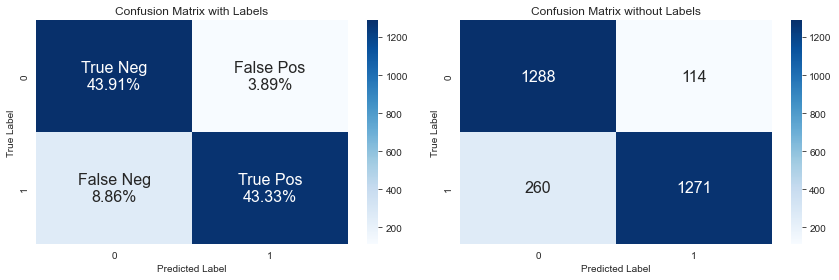

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [36]:
import pickle

# Save the trained model to a file in pickle format
model_filename = 'APD_model.pickle'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print("Model saved successfully.")


Model saved successfully.


In [37]:
print(mean(accuracy_list))

0.8713955573590697


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


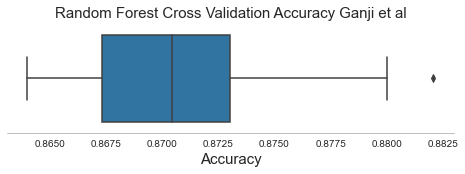

In [38]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [39]:
clf.feature_importances_

array([0.00585813, 0.00585897, 0.0060135 , 0.00574778, 0.00563242,
       0.00571792, 0.00574087, 0.00585139, 0.00537029, 0.00625197,
       0.00579304, 0.0057082 , 0.00569315, 0.00596253, 0.00589917,
       0.0063763 , 0.005595  , 0.00629419, 0.00615746, 0.00565402,
       0.00582181, 0.00583607, 0.0055448 , 0.00594003, 0.0052143 ,
       0.00591726, 0.00572367, 0.00539744, 0.00632158, 0.00637525,
       0.00568501, 0.00617625, 0.00568672, 0.00534181, 0.00529982,
       0.00531736, 0.00556056, 0.00589327, 0.00719978, 0.0064314 ,
       0.00595264, 0.00561404, 0.00592485, 0.00500142, 0.00588227,
       0.00817864, 0.00677924, 0.00638777, 0.00656015, 0.00624525,
       0.00602884, 0.0064465 , 0.00653792, 0.00668065, 0.00662021,
       0.00663142, 0.00667812, 0.00620663, 0.00643979, 0.00642514,
       0.00702591, 0.0068482 , 0.00774488, 0.00742385, 0.0070821 ,
       0.0082304 , 0.00971768, 0.01611552, 0.03970857, 0.12287501,
       0.0428533 , 0.01692477, 0.02831571, 0.04242821, 0.01873

In [40]:
clf.feature_importances_.shape

(99,)

In [41]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

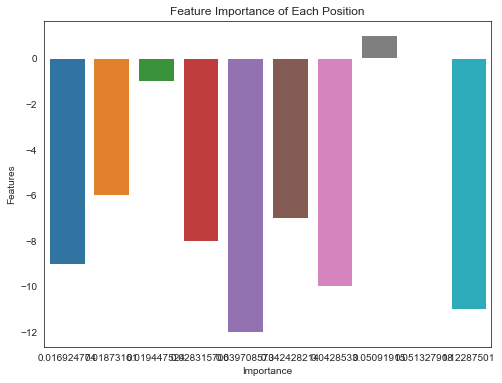

In [42]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [43]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.005858,-80
1,1,0.005859,-79
2,2,0.006013,-78
3,3,0.005748,-77
4,4,0.005632,-76
...,...,...,...
94,94,0.005097,14
95,95,0.006309,15
96,96,0.005662,16
97,97,0.005823,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

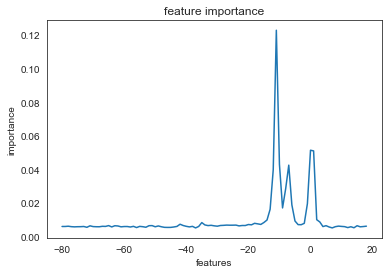

In [44]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [45]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8724855097170133
Precision: 0.9176895306859206
Recall: 0.8301763553233181
f1_score: 0.8717421124828533


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


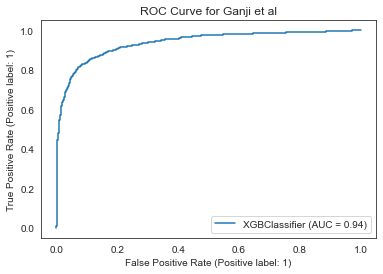

In [73]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


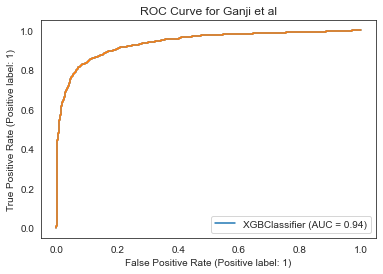

In [74]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

#roc_df.to_csv('d:/ROC Curve data/downstream_perez_xg_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [46]:
!pip install shap

In [47]:
import shap


In [48]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [49]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[8103, 1342, 9344, 4280, 7653, 3698, 9916, 3613, 5630, 1726, 9153, 6740, 6284, 3945, 7777, 1678, 8640, 1092, 962, 6652, 3072, 5220, 9864, 8236, 9397, 4662, 9665, 3843, 5922, 9161, 6583, 536, 6642, 4076, 6264, 8760, 639, 8950, 3869, 5619]


In [50]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [51]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-19.5,-16.7,-14.7,-14.9,-14.9,-19.2,-14.7,-15.8,-14.7,-15.8,...,-15.8,-14.9,-14.7,-15.8,-14.7,-16.7,-17.5,-14.7,-15.8,-14.7
6345,-18.1,-17.5,-14.7,-19.2,-14.7,-19.5,-18.1,-14.9,-14.9,-19.2,...,-17.5,-17.5,-17.5,-17.5,-16.7,-19.5,-14.7,-18.1,-14.9,-19.2
8807,-16.7,-17.5,-17.5,-17.5,-14.7,-14.9,-14.9,-14.9,-19.5,-15.8,...,-14.9,-19.5,-17.5,-17.5,-17.5,-17.5,-17.5,-16.7,-17.5,-14.7
5017,-14.9,-19.2,-18.1,-14.7,-15.8,-17.5,-17.0,-17.5,-17.5,-17.5,...,-14.7,-14.9,-19.5,-18.1,-19.5,-16.7,-17.0,-16.7,-17.5,-17.5
2395,-17.0,-17.5,-18.1,-19.5,-17.5,-15.8,-14.9,-18.1,-17.0,-15.8,...,-14.7,-16.7,-17.5,-14.7,-19.5,-18.1,-15.8,-19.5,-14.9,-18.1
4771,-16.7,-17.0,-16.7,-17.5,-14.7,-19.5,-16.7,-19.5,-18.1,-14.7,...,-19.5,-18.1,-15.8,-19.5,-14.7,-17.5,-16.7,-14.7,-15.8,-17.5
6378,-14.9,-18.1,-17.0,-18.1,-19.2,-14.7,-19.5,-16.7,-19.5,-14.7,...,-15.8,-17.0,-15.8,-14.9,-14.9,-18.1,-14.7,-19.5,-17.5,-17.5
6038,-14.9,-14.9,-14.7,-19.2,-14.7,-14.9,-19.2,-14.7,-17.5,-15.8,...,-14.7,-15.8,-19.5,-14.7,-19.5,-17.5,-15.8,-14.9,-14.7,-19.5
2073,-14.9,-19.2,-14.7,-15.8,-14.7,-19.2,-14.7,-15.8,-18.1,-17.5,...,-14.9,-14.9,-15.8,-14.7,-14.9,-19.2,-14.7,-19.2,-14.9,-18.1
8765,-18.1,-19.5,-18.1,-19.5,-18.1,-19.5,-17.5,-16.7,-19.5,-14.7,...,-17.5,-17.0,-17.5,-16.7,-17.5,-17.5,-17.5,-17.5,-17.5,-17.0


# X promoters

In [52]:
X_promoters= promoter.drop(columns=['label']) #X.loc[:14668]
X_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-19.5,-16.7,-17.5,-17.5,-14.7,-19.2,-14.7,-14.9,-19.5,-17.5,...,-15.8,-14.7,-19.2,-14.7,-15.8,-14.7,-19.5,-17.5,-15.8,-14.7
1,-17.0,-17.5,-16.7,-17.5,-19.5,-14.7,-19.5,-16.7,-19.5,-14.7,...,-18.1,-19.5,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-16.7,-17.5
2,-15.8,-17.5,-17.5,-14.7,-19.5,-18.1,-15.8,-14.7,-15.8,-17.5,...,-17.5,-19.5,-18.1,-17.5,-17.0,-16.7,-17.0,-17.5,-16.7,-19.5
3,-17.5,-17.5,-18.1,-19.2,-14.7,-19.2,-14.7,-19.5,-17.5,-17.5,...,-15.8,-17.5,-17.0,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-19.5
4,-14.7,-18.1,-15.8,-17.5,-17.0,-17.5,-16.7,-17.0,-17.5,-16.7,...,-18.1,-19.5,-17.5,-16.7,-17.0,-17.5,-15.8,-14.7,-19.2,-14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-18.1,-15.8,-19.5,-14.7,-19.5,-18.1,-19.2,-14.9,-14.7,-15.8,...,-19.5,-14.7,-18.1,-15.8,-19.5,-14.7,-16.7,-17.0,-16.7,-17.5
14665,-14.7,-19.5,-16.7,-17.5,-14.7,-19.5,-16.7,-17.5,-17.5,-14.7,...,-15.8,-14.7,-14.9,-15.8,-17.5,-19.5,-14.7,-14.9,-14.9,-19.5
14666,-19.5,-14.9,-14.7,-17.5,-17.5,-17.5,-17.5,-17.5,-15.8,-18.1,...,-14.9,-18.1,-19.5,-14.7,-17.5,-15.8,-14.9,-14.9,-18.1,-14.7
14667,-17.5,-14.7,-19.5,-18.1,-15.8,-17.5,-19.5,-14.7,-15.8,-19.5,...,-17.5,-15.8,-14.9,-18.1,-17.0,-15.8,-14.9,-18.1,-19.5,-14.7


In [53]:
explainer = shap.TreeExplainer(clf, X_promoters)
shap_values = explainer.shap_values(X_promoters)

100%|===================| 14648/14669 [05:32<00:00]        

In [54]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

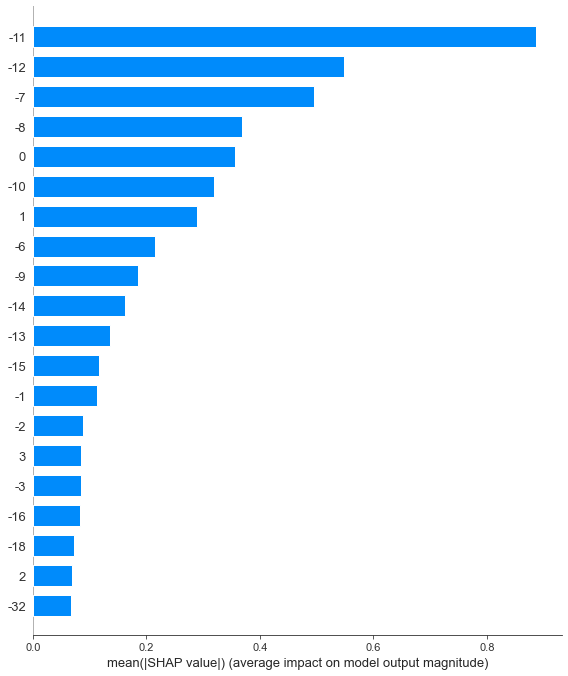

In [55]:
shap.summary_plot(shap_values,X_promoters, plot_type="bar", feature_names = X_promoters.columns)

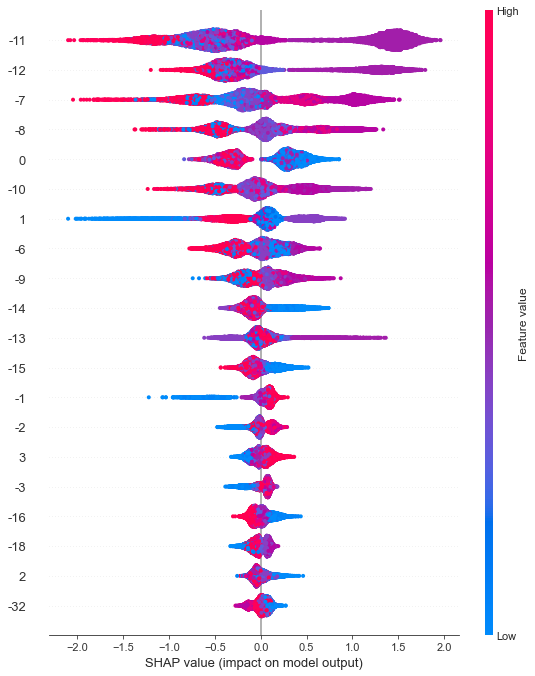

In [56]:
shap.summary_plot(shap_values, X_promoters, feature_names = X_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

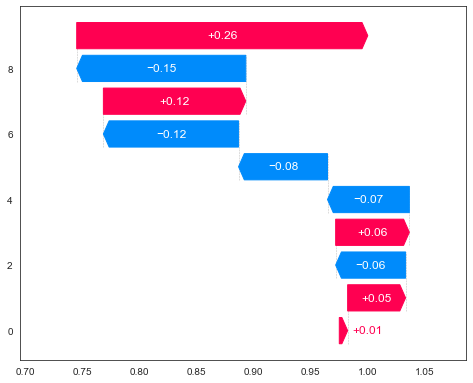

In [55]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [75]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\perez\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\perez\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\perez\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\perez\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [76]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Perez Test Organism')]

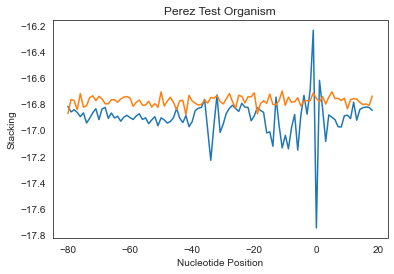

In [77]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Perez Test Organism')

## Test Labels

In [78]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [79]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [80]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.917965367965368


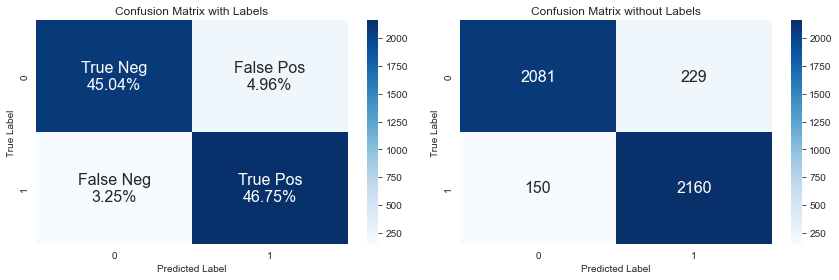

In [81]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [83]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.9177489177489178, Precision: 0.9004149377593361, Recall: 0.9393939393939394, F1 Score: 0.9194915254237289, MCC: 0.8362818106689114, Specificity: 0.8961038961038961
Fold 2/10
 Accuracy: 0.9177489177489178, Precision: 0.8906882591093117, Recall: 0.9523809523809523, F1 Score: 0.9205020920502092, MCC: 0.8375092308167292, Specificity: 0.8831168831168831
Fold 3/10
 Accuracy: 0.8961038961038961, Precision: 0.8860759493670886, Recall: 0.9090909090909091, F1 Score: 0.8974358974358974, MCC: 0.7924751590031897, Specificity: 0.8831168831168831
Fold 4/10
 Accuracy: 0.9242424242424242, Precision: 0.9016393442622951, Recall: 0.9523809523809523, F1 Score: 0.9263157894736841, MCC: 0.8498316696539847, Specificity: 0.8961038961038961
Fold 5/10
 Accuracy: 0.9458874458874459, Precision: 0.9364406779661016, Recall: 0.9567099567099567, F1 Score: 0.9464668094218416, MCC: 0.8919838665800454, Specificity: 0.935064935064935
Fold 6/10
 Accuracy: 0.9155844155844156, Precision: 0.906779661016

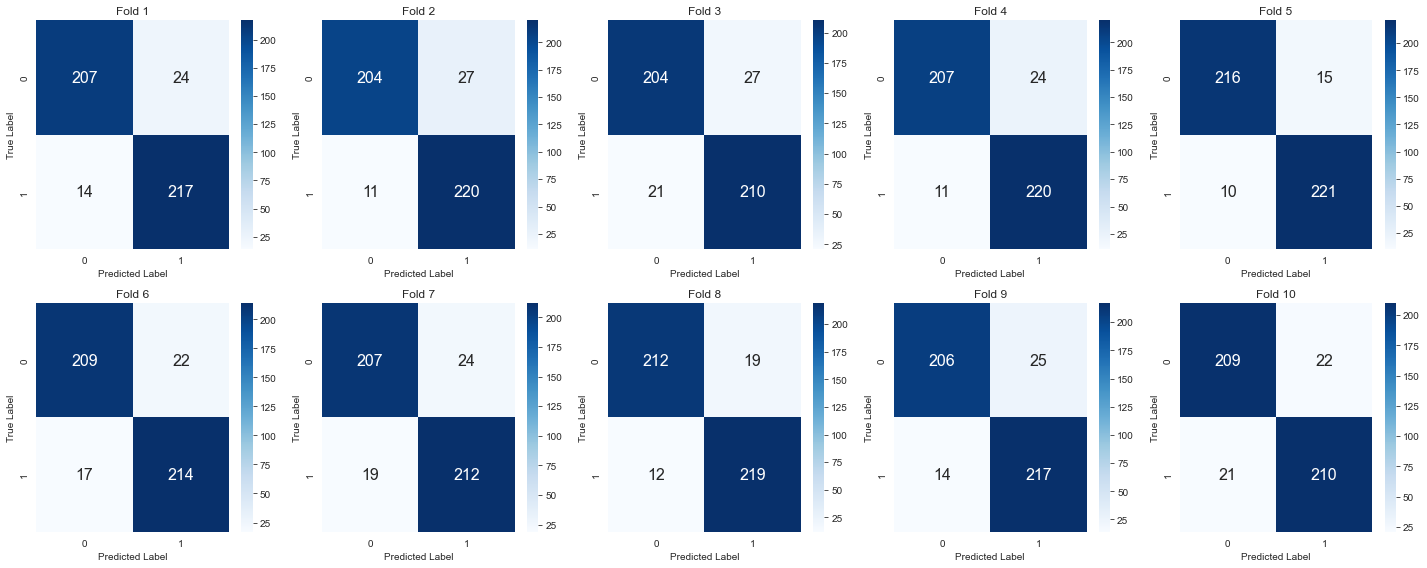

In [84]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [85]:
test_accuracy

[0.9177489177489178,
 0.9177489177489178,
 0.8961038961038961,
 0.9242424242424242,
 0.9458874458874459,
 0.9155844155844156,
 0.9069264069264069,
 0.9329004329004329,
 0.9155844155844156,
 0.9069264069264069]

In [86]:
test_precision

[0.9004149377593361,
 0.8906882591093117,
 0.8860759493670886,
 0.9016393442622951,
 0.9364406779661016,
 0.9067796610169492,
 0.8983050847457628,
 0.9201680672268907,
 0.8966942148760331,
 0.9051724137931034]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [87]:
test_recall

[0.9393939393939394,
 0.9523809523809523,
 0.9090909090909091,
 0.9523809523809523,
 0.9567099567099567,
 0.9264069264069265,
 0.9177489177489178,
 0.948051948051948,
 0.9393939393939394,
 0.9090909090909091]

In [88]:
test_specificity

[0.8961038961038961,
 0.8831168831168831,
 0.8831168831168831,
 0.8961038961038961,
 0.935064935064935,
 0.9047619047619048,
 0.8961038961038961,
 0.9177489177489178,
 0.8917748917748918,
 0.9047619047619048]

In [89]:
test_f1_score

[0.9194915254237289,
 0.9205020920502092,
 0.8974358974358974,
 0.9263157894736841,
 0.9464668094218416,
 0.9164882226980727,
 0.9079229122055675,
 0.9339019189765458,
 0.9175475687103595,
 0.9071274298056156]

In [90]:
test_mcc

[0.8362818106689114,
 0.8375092308167292,
 0.7924751590031897,
 0.8498316696539847,
 0.8919838665800454,
 0.8313636038027606,
 0.8140435287235365,
 0.8661986608440464,
 0.8321128051597896,
 0.8138604398741863]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [91]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense perez promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-17.0,-15.8,-14.9,-14.7,-16.7,-17.5,-14.7,-15.8,-17.5,-17.5,...,-14.9,-19.5,-17.5,-17.5,-17.5,-15.8,-14.7,-17.5,-15.8,1
1,-14.7,-17.5,-15.8,-14.7,-19.2,-14.7,-16.7,-17.0,-17.5,-15.8,...,-17.5,-15.8,-14.7,-19.5,-16.7,-14.7,-14.9,-19.5,-17.5,1
2,-17.5,-14.7,-19.5,-16.7,-19.5,-14.7,-16.7,-17.0,-16.7,-17.0,...,-15.8,-14.7,-15.8,-14.7,-19.2,-18.1,-17.0,-17.5,-17.5,1
3,-14.7,-15.8,-17.0,-15.8,-14.7,-17.5,-15.8,-14.7,-15.8,-19.5,...,-19.5,-14.9,-14.7,-15.8,-14.7,-17.5,-17.5,-16.7,-19.5,1
4,-15.8,-14.9,-18.1,-17.0,-17.5,-17.5,-16.7,-17.0,-18.1,-14.9,...,-19.5,-15.8,-14.9,-14.7,-14.9,-14.9,-15.8,-14.7,-15.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-19.2,-18.1,-17.5,-17.5,-14.7,-14.9,-14.9,-14.9,-15.8,-17.5,...,-17.5,-14.7,-19.5,-16.7,-14.7,-19.2,-18.1,-14.7,-14.9,0
12164,-17.5,-14.7,-15.8,-17.5,-14.7,-19.2,-14.9,-18.1,-19.5,-14.7,...,-18.1,-14.9,-19.2,-14.9,-14.7,-15.8,-14.7,-19.2,-14.7,0
12165,-15.8,-19.5,-14.7,-16.7,-19.5,-14.9,-14.9,-14.9,-14.7,-15.8,...,-18.1,-15.8,-17.0,-17.5,-18.1,-19.5,-15.8,-14.7,-14.9,0
12166,-17.5,-15.8,-14.7,-16.7,-17.5,-19.5,-14.7,-19.2,-14.9,-14.9,...,-14.9,-14.9,-14.7,-18.1,-15.8,-17.5,-17.5,-17.0,-15.8,0


In [92]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [93]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8069022185702547, Precision: 0.8158783783783784, Recall: 0.7931034482758621, F1 Score: 0.8043297252289758, MCC: 0.6140527139817792, Specificity: 0.9047619047619048
Fold 2/10
 Accuracy: 0.8208709942481512, Precision: 0.8078740157480315, Recall: 0.8423645320197044, F1 Score: 0.8247588424437299, MCC: 0.6423158105666673, Specificity: 0.8207236842105263
Fold 3/10
 Accuracy: 0.8241577649958916, Precision: 0.8275290215588723, Recall: 0.819376026272578, F1 Score: 0.8234323432343235, MCC: 0.6483496603629276, Specificity: 0.7993421052631579
Fold 4/10
 Accuracy: 0.819227608874281, Precision: 0.8132045088566827, Recall: 0.8292282430213465, F1 Score: 0.8211382113821138, MCC: 0.6385733027746446, Specificity: 0.8289473684210527
Fold 5/10
 Accuracy: 0.8290879211175021, Precision: 0.826797385620915, Recall: 0.8322368421052632, F1 Score: 0.8295081967213116, MCC: 0.6581916785013939, Specificity: 0.8092105263157895
Fold 6/10
 Accuracy: 0.8315529991783073, Precision: 0.81435257410296

In [94]:
antisense_accuracy

[0.8069022185702547,
 0.8208709942481512,
 0.8241577649958916,
 0.819227608874281,
 0.8290879211175021,
 0.8315529991783073,
 0.8323746918652424,
 0.8200493015612161,
 0.8133223684210527,
 0.8264802631578947]

In [95]:
antisense_precision

[0.8158783783783784,
 0.8078740157480315,
 0.8275290215588723,
 0.8132045088566827,
 0.826797385620915,
 0.8143525741029641,
 0.8237179487179487,
 0.8043818466353677,
 0.8107667210440457,
 0.8291873963515755]

In [96]:
antisense_recall

[0.7931034482758621,
 0.8423645320197044,
 0.819376026272578,
 0.8292282430213465,
 0.8322368421052632,
 0.8585526315789473,
 0.8453947368421053,
 0.8453947368421053,
 0.8174342105263158,
 0.8223684210526315]

In [97]:
antisense_specificity

[0.9047619047619048,
 0.8207236842105263,
 0.7993421052631579,
 0.8289473684210527,
 0.8092105263157895,
 0.825944170771757,
 0.8045977011494253,
 0.819376026272578,
 0.7947454844006568,
 0.8092105263157895]

In [98]:
antisense_f1_score

[0.8043297252289758,
 0.8247588424437299,
 0.8234323432343235,
 0.8211382113821138,
 0.8295081967213116,
 0.8358686949559647,
 0.8344155844155844,
 0.8243785084202084,
 0.8140868140868142,
 0.8257638315441783]

In [99]:
antisense_mcc

[0.6140527139817792,
 0.6423158105666673,
 0.6483496603629276,
 0.6385733027746446,
 0.6581916785013939,
 0.6640979985135674,
 0.664986310853273,
 0.6409456483504511,
 0.6266659275897553,
 0.6529826069636032]

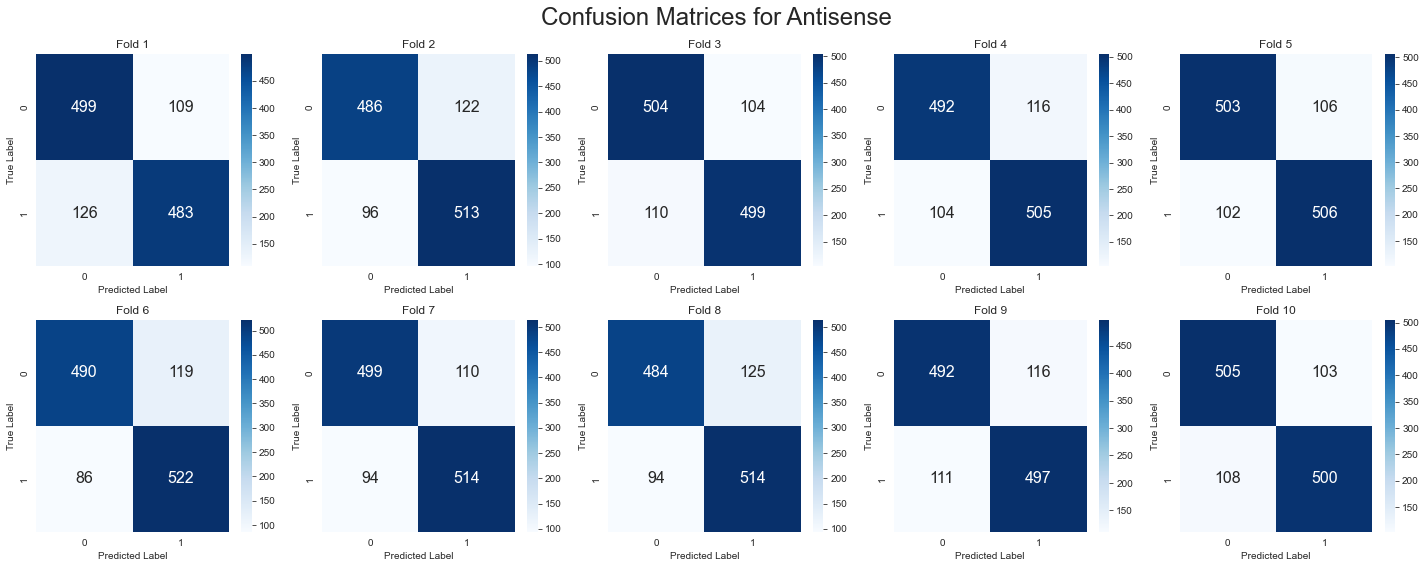

In [100]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

In [101]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced perez promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-15.8,-14.7,-19.2,-18.1,-17.0,-18.1,-19.2,-14.9,-14.9,-14.7,...,-17.5,-15.8,-14.7,-17.5,-17.5,-17.5,-16.7,-14.7,-19.5,1
1,-16.7,-14.7,-19.5,-17.5,-17.5,-16.7,-17.5,-17.5,-17.0,-18.1,...,-19.5,-15.8,-14.7,-15.8,-17.5,-17.0,-16.7,-19.5,-14.7,1
2,-14.9,-14.9,-14.7,-14.9,-19.5,-16.7,-19.5,-14.7,-19.5,-15.8,...,-15.8,-14.7,-19.5,-17.5,-16.7,-17.5,-19.5,-14.7,-15.8,1
3,-18.1,-19.5,-17.5,-18.1,-15.8,-19.5,-14.7,-16.7,-17.5,-17.0,...,-17.5,-17.5,-18.1,-19.2,-14.7,-17.5,-17.5,-16.7,-14.7,1
4,-15.8,-14.7,-15.8,-17.5,-17.5,-17.0,-17.5,-17.5,-16.7,-14.7,...,-18.1,-19.5,-17.5,-15.8,-14.7,-17.5,-17.5,-17.5,-16.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-14.9,-14.7,-14.9,-14.9,-19.5,-18.1,-19.2,-14.9,-14.7,-19.2,...,-19.5,-17.5,-18.1,-15.8,-14.7,-14.9,-14.9,-19.2,-14.9,0
12126,-14.9,-19.2,-14.7,-18.1,-19.2,-14.7,-19.5,-17.5,-15.8,-14.7,...,-14.9,-14.7,-19.2,-14.7,-17.5,-18.1,-14.9,-19.2,-14.7,0
12127,-17.5,-15.8,-14.7,-17.5,-15.8,-14.7,-18.1,-14.9,-19.2,-14.7,...,-19.5,-18.1,-19.2,-14.7,-14.9,-19.5,-18.1,-14.9,-19.5,0
12128,-14.7,-14.9,-19.2,-14.7,-17.5,-15.8,-14.7,-18.1,-14.9,-19.5,...,-14.7,-19.2,-14.9,-14.7,-16.7,-14.7,-19.2,-14.9,-14.7,0


In [102]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [103]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8276999175597691, Precision: 0.8407534246575342, Recall: 0.8088962108731467, F1 Score: 0.8245172124265324, MCC: 0.6558821322320133, Specificity: 0.8305921052631579
Fold 2/10
 Accuracy: 0.8202802967848309, Precision: 0.8370883882149047, Recall: 0.7957166392092258, F1 Score: 0.8158783783783784, MCC: 0.6413600316796876, Specificity: 0.8465346534653465
Fold 3/10
 Accuracy: 0.8070898598516076, Precision: 0.8209982788296041, Recall: 0.785831960461285, F1 Score: 0.803030303030303, MCC: 0.6147581971481153, Specificity: 0.8448844884488449
Fold 4/10
 Accuracy: 0.8219291014014839, Precision: 0.8411867364746946, Recall: 0.7940691927512356, F1 Score: 0.8169491525423728, MCC: 0.6448884540740888, Specificity: 0.8283828382838284
Fold 5/10
 Accuracy: 0.807914262159934, Precision: 0.8158783783783784, Recall: 0.7957166392092258, F1 Score: 0.8056713928273561, MCC: 0.6160245208788149, Specificity: 0.8498349834983498
Fold 6/10
 Accuracy: 0.8194558944765046, Precision: 0.82521008403361

In [104]:
internal_accuracy

[0.8276999175597691,
 0.8202802967848309,
 0.8070898598516076,
 0.8219291014014839,
 0.807914262159934,
 0.8194558944765046,
 0.8244023083264633,
 0.8062654575432812,
 0.8178070898598516,
 0.8458367683429514]

In [105]:
internal_precision

[0.8407534246575342,
 0.8370883882149047,
 0.8209982788296041,
 0.8411867364746946,
 0.8158783783783784,
 0.8252100840336134,
 0.8302521008403362,
 0.8237347294938918,
 0.8359511343804538,
 0.8618307426597582]

In [106]:
internal_recall

[0.8088962108731467,
 0.7957166392092258,
 0.785831960461285,
 0.7940691927512356,
 0.7957166392092258,
 0.8102310231023102,
 0.8151815181518152,
 0.7788778877887789,
 0.7904290429042904,
 0.8234323432343235]

In [107]:
internal_specificity

[0.8305921052631579,
 0.8465346534653465,
 0.8448844884488449,
 0.8283828382838284,
 0.8498349834983498,
 0.8201320132013201,
 0.828665568369028,
 0.8336079077429983,
 0.8336079077429983,
 0.8451400329489291]

In [108]:
internal_f1_score

[0.8245172124265324,
 0.8158783783783784,
 0.803030303030303,
 0.8169491525423728,
 0.8056713928273561,
 0.8176519567027477,
 0.8226477935054122,
 0.8006785411365563,
 0.8125530110262934,
 0.8421940928270042]

In [109]:
internal_mcc

[0.6558821322320133,
 0.6413600316796876,
 0.6147581971481153,
 0.6448884540740888,
 0.6160245208788149,
 0.639011256265438,
 0.6489058661872292,
 0.6134220469315997,
 0.6365406125668749,
 0.6923484602730122]

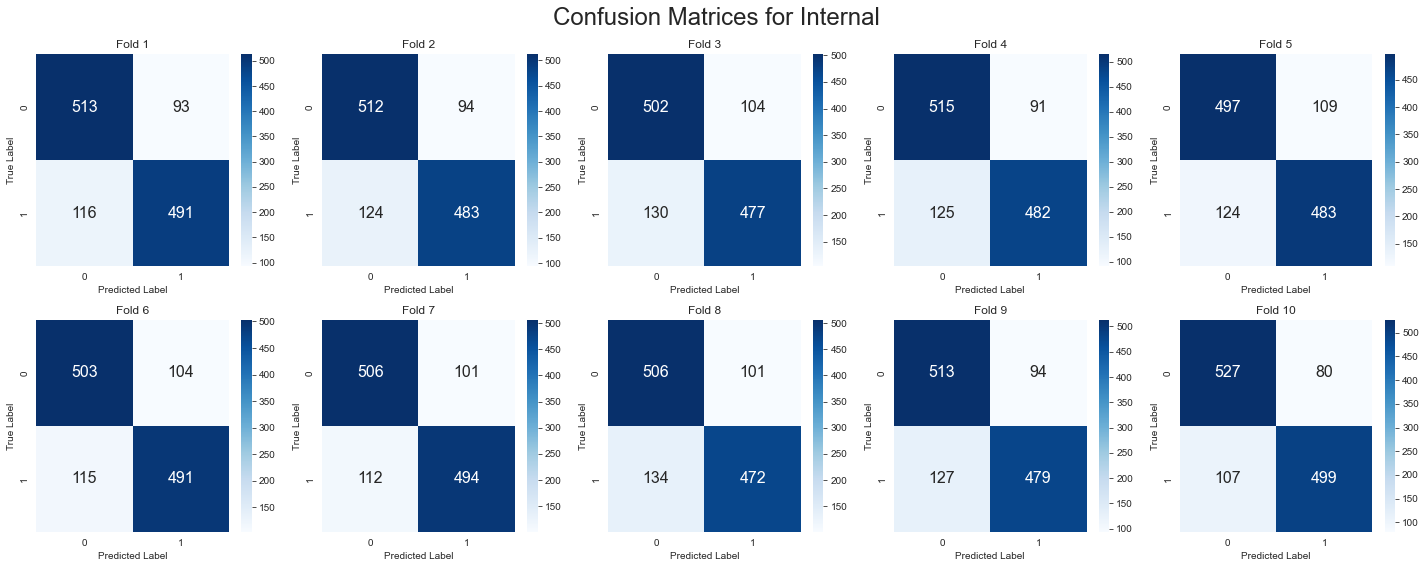

In [110]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
